In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from spacy.lang.pl import Polish

from tool.annotations_utils import read_annotations
from tool.file_and_directory_management import read_file_to_list
PATH_TO_TITLES = '..\\data\\novels_titles\\polish.txt'
PATH_TO_CHARACTERS_LISTS = '..\\data\\lists_of_characters\\'
PATH_TO_ANNOTATIONS = '..\\experiments\\polish\\'
PATH_TO_GOLD_ANNOTATIONS = '..\\data\\testing_sets\\test_polish_gold_standard\\'

In [2]:
TITLES = read_file_to_list(PATH_TO_TITLES)
for i in range(len(TITLES)):
    TITLES[i] = '_'.join(TITLES[i].split(' '))

TITLES

['Hrabia_Monte_Christo',
 'Nad_Niemnem',
 'Robinson_Crusoe',
 'Przedwiosnie',
 'W_pustyni_i_w_puszczy',
 'Ksiega_dzungli',
 'Krzyzacy',
 'Lalka',
 'Maly_Ksiaze']

In [46]:
def count_characters_occurrences(annotations, characters):
    count_persons_annotations = dict.fromkeys(characters, 0)
    for a in annotations:
        entities = a['entities']
        for i in range(len(entities)):
            character = entities[i][2]
            count_persons_annotations[character] += 1

    df = pd.Series(count_persons_annotations).to_frame('count')
    return df.loc[df['count'] != 0]


def plot_novel_character_statistics(title):
    protagonists = read_file_to_list(PATH_TO_CHARACTERS_LISTS + title)
    protagonists.append('PERSON')
    pre_annotations = read_annotations(PATH_TO_ANNOTATIONS + f'{title}.json')
    gold_annotations = read_annotations(PATH_TO_GOLD_ANNOTATIONS + f'{title}.json')

    characters_count_pre_annotation = count_characters_occurrences(pre_annotations, protagonists)
    characters_count_gold_annotation = count_characters_occurrences(gold_annotations, protagonists)
    print(title)
    fig, ax = plt.subplots(1, 2, figsize=[16, 6])

    characters_count_pre_annotation.sort_values(by='count').plot.barh(ax=ax[0])
    ax[0].set_title('Pre-annotated data')
    characters_count_gold_annotation.sort_values(by='count').plot.barh(ax=ax[1])
    ax[1].set_title('Correctly annotated data')

    plt.subplots_adjust(wspace=0.5)
    plt.savefig('..\\experiments\\plots\\ksiega_dzungli_plot.png')
    #plt.show()

## Characters occurrences

Hrabia_Monte_Christo


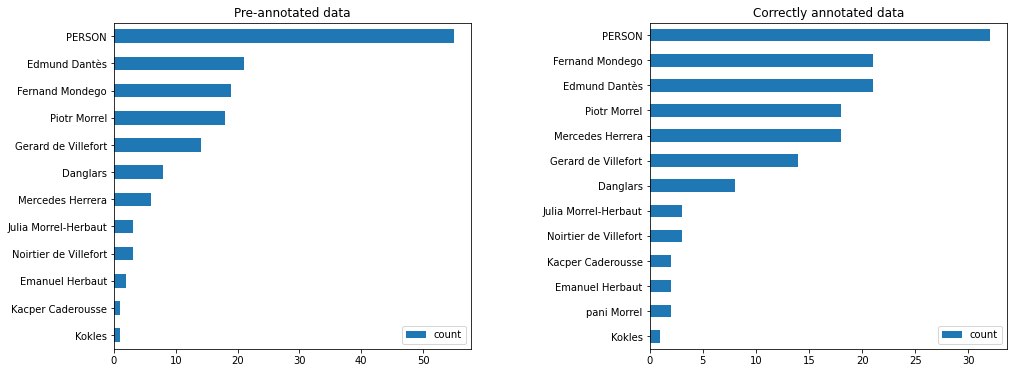

Nad_Niemnem


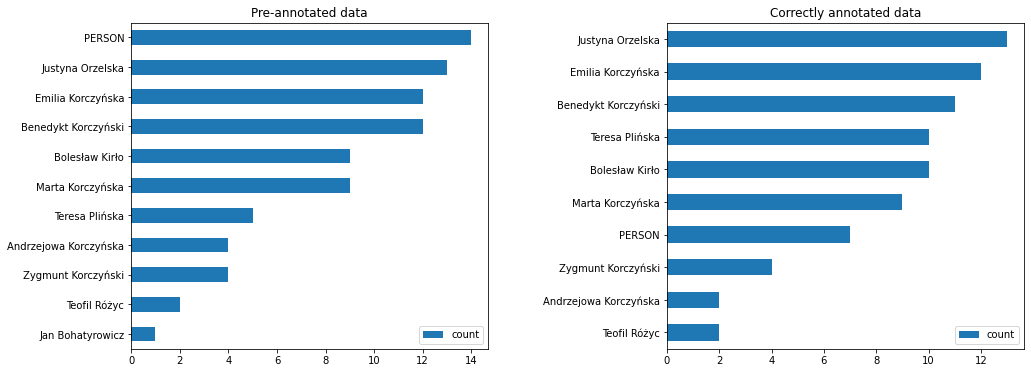

Robinson_Crusoe


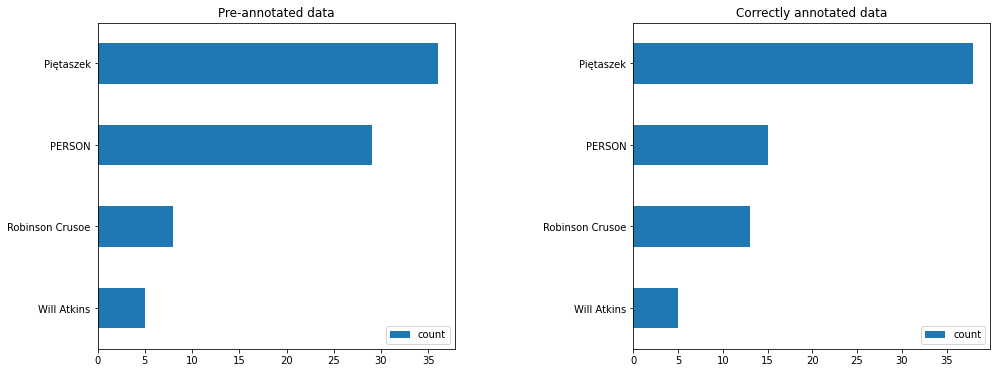

Przedwiosnie


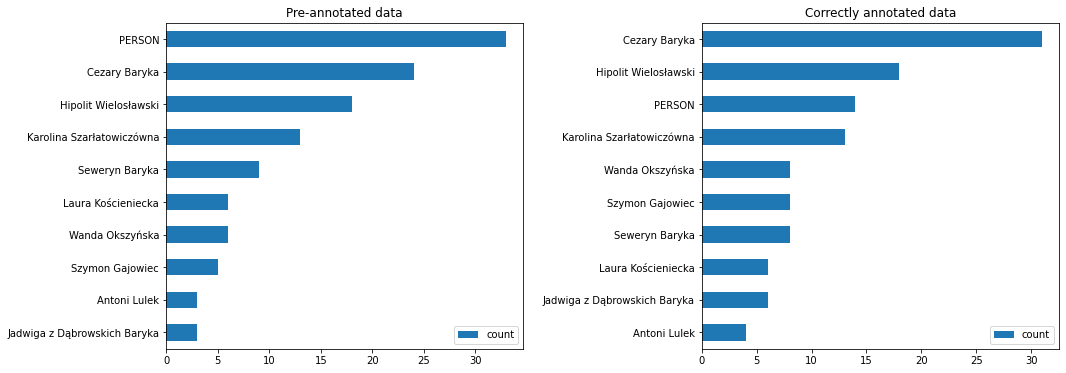

W_pustyni_i_w_puszczy


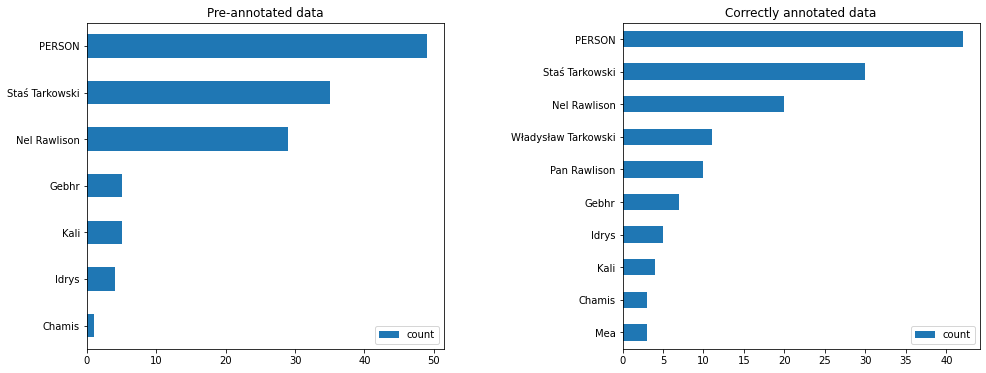

Ksiega_dzungli


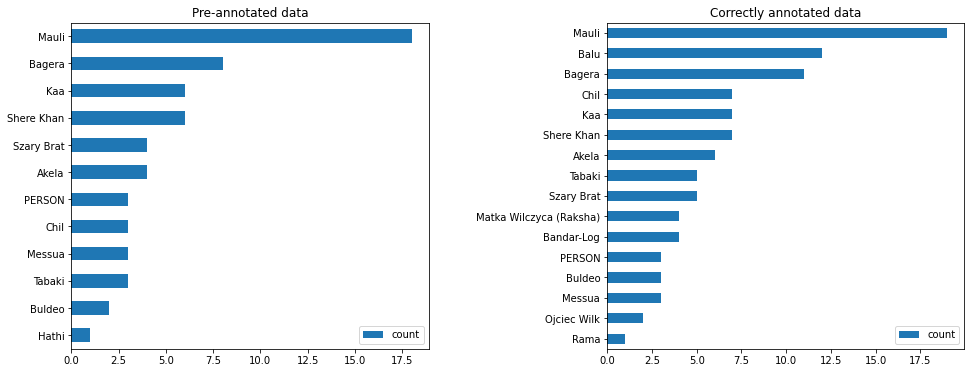

Krzyzacy


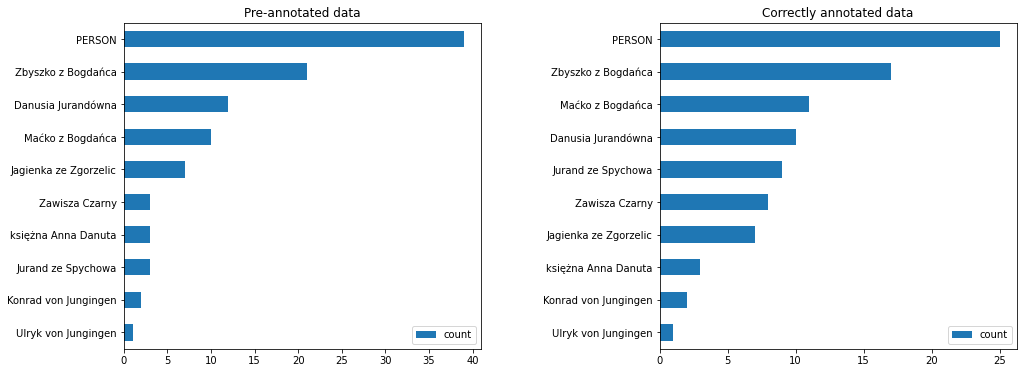

Lalka


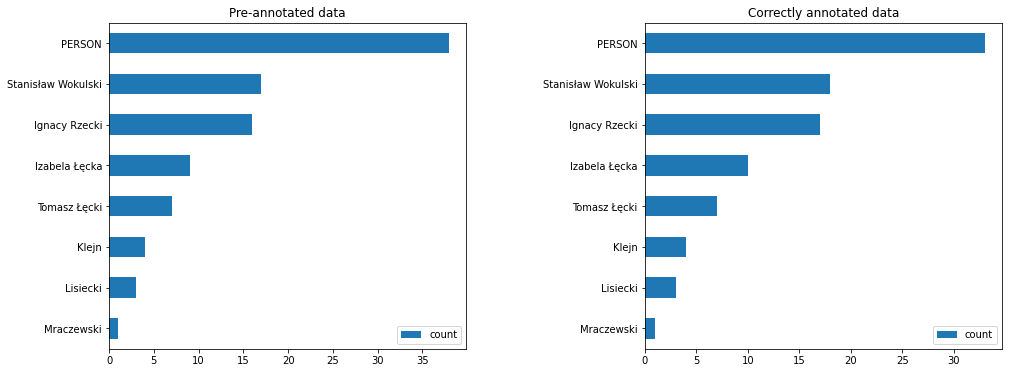

Maly_Ksiaze


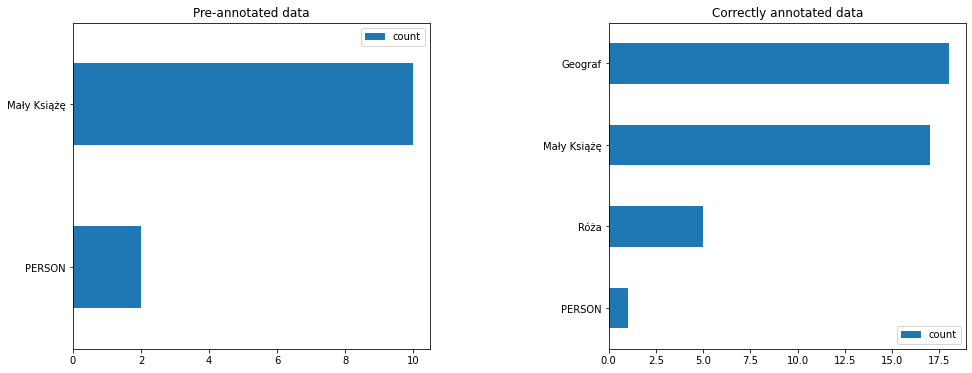

In [14]:
for title in TITLES:
    plot_novel_character_statistics(title)

 ## Books' statistics

Ksiega_dzungli


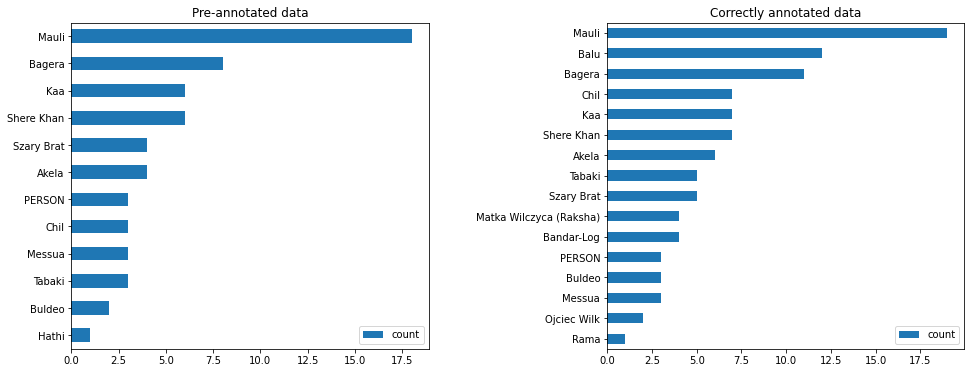

In [47]:
plot_novel_character_statistics('Ksiega_dzungli')

In [29]:
def count_word_average_length(doc, nlp):
    tokens_text = []
    for token in doc:
        tokens_text.append(token.text)

    words = []
    for token in tokens_text:
        if not (nlp.vocab[token].is_stop or nlp.vocab[token].is_punct):
            words.append(token)

    num_of_characters = 0
    for word in words:
        num_of_characters += len(word)

    return num_of_characters / len(words)


def count_sentence_average_character_length(sentences):
    num_of_characters = 0
    for sent in sentences:
        num_of_characters += len(sent)

    return num_of_characters / len(sentences)


def count_sentence_average_word_length(sentences, nlp):
    num_of_words = 0
    for sent in sentences:
        num_of_words += len(nlp(sent))

    return num_of_words / len(sentences)

def calculate_statistics(title, df):
    annotations = read_annotations(PATH_TO_GOLD_ANNOTATIONS + f'{title}.json')
    contents = [a['content'] for a in annotations]

    nlp = Polish()
    doc = nlp(' '.join(contents))
    title = title.replace('_', ' ')
    df.loc[title, 'average_word_length'] = count_word_average_length(doc, nlp)
    df.loc[title, 'average_sentence_length'] = count_sentence_average_character_length(contents)
    df.loc[title, 'average_num_of_words_in_sentence'] = count_sentence_average_word_length(contents, nlp)


In [30]:
statistics_df = pd.DataFrame()
for title in TITLES:
    calculate_statistics(title, statistics_df)
statistics_df

,average_word_length,average_sentence_length,average_num_of_words_in_sentence
Hrabia Monte Christo,7.139299,99.757576,18.776515
Nad Niemnem,6.956464,87.963542,17.010417
Robinson Crusoe,6.927389,89.408072,16.771300
Przedwiosnie,7.437500,110.930000,19.880000
W pustyni i w puszczy,6.950966,135.190909,25.454545
Ksiega dzungli,6.621015,88.560000,17.720000
Krzyzacy,6.833491,164.685714,32.085714
Lalka,6.947937,137.543210,26.913580
Maly Ksiaze,7.153578,77.258427,15.224719


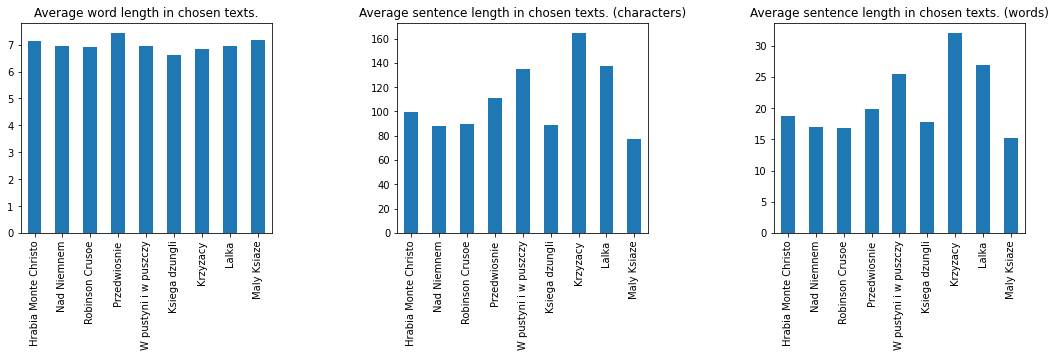

In [43]:
fig, ax = plt.subplots(1, 3, figsize=[18, 4])
statistics_df['average_word_length'].plot.bar(ax=ax[0])
ax[0].set_title('Average word length in chosen texts.')
statistics_df['average_sentence_length'].plot.bar(ax=ax[1])
ax[1].set_title('Average sentence length in chosen texts. (characters)')
statistics_df['average_num_of_words_in_sentence'].plot.bar(ax=ax[2])
ax[2].set_title('Average sentence length in chosen texts. (words)')
plt.subplots_adjust(wspace=0.5, bottom=0.15)
plt.savefig('..\\experiments\\plots\\general_statistics.png', bbox_inches='tight')
#plt.show()

<Figure size 432x288 with 0 Axes>